In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.model_selection import train_test_split

In [2]:
# import model
import Isolation_Forest as iso
import Local_Outlier_Factor as lof
import Logistic_Regression as log_reg
import Support_Vector_Machine as svm

In [3]:
#read data from excel (Data-set)
data=pd.read_csv(r"C:\\Users\\hp\\Desktop\\ml\\creditcard.csv") 
x=data.iloc[1:, 1:29]     
y=data.iloc[1:,30]     
#for making it normal
x = x-np.mean(x)
x = x/np.std(x)
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.01)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.001)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.001)

In [5]:
#Logistic Regression
model = log_reg.LogisticRegression(lr=0.01, num_iter=1000)
model.fit(x_test, y_test)
preds = model.predict(x_test1)
log_reg_accuracy = (preds == y_test1).mean()
log_reg_accuracy

0.9929824561403509

In [6]:
#Local Outlier Factor
y_lof = lof.LocalOutlierFactor(X=x_test, k=10, outlier_threshold = 4)
lof_accuracy = (y_lof == y_test).mean()
lof_accuracy

0.9964912280701754

In [7]:
#Support Vector Machine
model_svm = svm.SVM()
model_svm.fit(X = x_test, y=y_test)
y_svm = model_svm.predict(x_test1)
svm_accuracy = (y_svm == y_test1).mean()
svm_accuracy

0.9929824561403509

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 0, 'anomaly score')

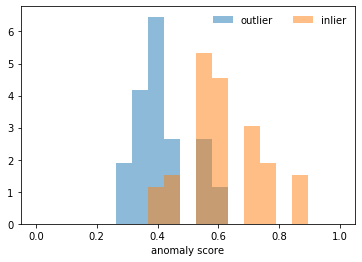

In [17]:
# Isolation Forest
F = iso.iForest(X=x_test,ntrees=50, sample_size=25)
S=F.compute_paths(X_in=x_test)
ss=np.argsort(S)
values_0 = F.compute_paths_single(x_test.values[ss[0]])
values_L = F.compute_paths_single(x_test.values[ss[-1]])
plt.hist(values_0,bins=np.linspace(0,1,20),normed=True,alpha=0.5,label='outlier')
plt.hist(values_L,bins=np.linspace(0,1,20),normed=True,alpha=0.5,label='inlier')
plt.legend(loc=0, frameon=False, ncol=2)
plt.xlabel('anomaly score')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'anomaly score')

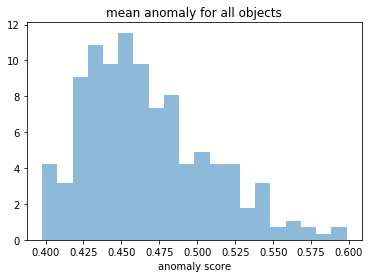

In [18]:
plt.hist(S, bins=20, normed=True, alpha=0.5)
plt.title('mean anomaly for all objects')
plt.xlabel('anomaly score')